### Taylor Series

Best viewed on notebook viewer
https://nbviewer.jupyter.org/github/coderofgames/Python-Math/blob/master/Vectors/Taylor_Series.ipynb

The Taylor series of a function about a point $a$ is 
   
$$ f(x) = f(a) +  f'(a)(x-a) + \frac{1}{2!} f''(a)(x-a)^2 + \frac{1}{3!} f'''(a)(x-a)^3 +\cdots + \frac{1}{n!}f^n(a)(x-a)^n $$
   
The end is often abreviated to $O(x^4)$ to mean plus terms in the order of $x^4$. The series can also be written
   
$$ f(x) = f(a) +  h f'(a) + \frac{h^2}{2!} f''(a) + \frac{h^3}{3!} f'''(a) +\cdots + \frac{h^m}{n!}f^n(a) $$
   
where $h = \delta x = x-a$. The series can also be written as a sum
   
$$ f(x) = \sum_{n=0}^\infty \frac{h^n }{n!} \frac{d^n f(a)}{dx^n} $$

In [1]:
# stack overflow link
# https://stackoverflow.com/questions/16869587/how-to-do-a-symbolic-taylor-expansion-of-an-unknown-function-fx-using-sympy
from sympy import init_printing, symbols, Function
init_printing()

x, a = symbols("x,a")
h = symbols("h")
f = Function("f")

f(x).series(x, x0=a, n=4)

                                              ⎛  2        ⎞│                 ⎛
                                            2 ⎜ d         ⎟│               3 ⎜
                                    (-a + x) ⋅⎜────(f(ξ₁))⎟│       (-a + x) ⋅⎜
                                              ⎜   2       ⎟│                 ⎜
                ⎛ d        ⎞│                 ⎝dξ₁        ⎠│ξ₁=a             ⎝
f(a) + (-a + x)⋅⎜───(f(ξ₁))⎟│     + ──────────────────────────── + ───────────
                ⎝dξ₁       ⎠│ξ₁=a                2                            

  3        ⎞│                          
 d         ⎟│                          
────(f(ξ₁))⎟│                          
   3       ⎟│                          
dξ₁        ⎠│ξ₁=a    ⎛        4       ⎞
───────────────── + O⎝(-a + x) ; x → a⎠
  6                                    

In [2]:
f(x).series(x, x0=a, n=4).subs({(x):h+a})

                                ⎛  2        ⎞│          ⎛  3        ⎞│        
                              2 ⎜ d         ⎟│        3 ⎜ d         ⎟│        
                             h ⋅⎜────(f(ξ₁))⎟│       h ⋅⎜────(f(ξ₁))⎟│        
                                ⎜   2       ⎟│          ⎜   3       ⎟│        
         ⎛ d        ⎞│          ⎝dξ₁        ⎠│ξ₁=a      ⎝dξ₁        ⎠│ξ₁=a    
f(a) + h⋅⎜───(f(ξ₁))⎟│     + ───────────────────── + ───────────────────── + O
         ⎝dξ₁       ⎠│ξ₁=a             2                       6              

    
    
    
    
⎛ 4⎞
⎝h ⎠
    

from wikipedia, the generalized Taylor series to functions of more than one variable is
   
$$ T(x_1,\cdots,x_d) = \sum_{n_1=0}^\infty \cdots \sum_{n_d=0}^\infty \frac{(x_1 - a_1)^{n_1}\cdots (x_d - a_d)^{n_d}}{n_1 ! \cdots n_d !}\left(\frac{\partial^{n_1+\cdots +n_d} T}{\partial x_1^{n_1}\cdots \partial x_d^{n_s}}\right) (a_1,\cdots, a_d)$$
   
denoting the expansion about the point $(a_1,\cdots, a_d)$ where $d$ is the dimension of the multi-index.

In [3]:
y, b = symbols("y, b")


In [4]:
# stack overflow link 
# https://stackoverflow.com/questions/22857162/multivariate-taylor-approximation-in-sympy
# multi variable taylor series
from sympy import *

(f(x,y).series(x,x0=a,n=3).removeO().series(y,x0=b,n=3).removeO())

                                                    ⎛    ⎛          ⎛  2      
                                                    ⎜    ⎜        2 ⎜ ∂       
                                                    ⎜    ⎜(-b + y) ⋅⎜────(f(ξ₁
   ⎛  2                                 ⎞│          ⎜  2 ⎜          ⎜   2     
 2 ⎜ ∂  ⎛         ⎛ ∂            ⎞│    ⎞⎟│        2 ⎜ ∂  ⎜          ⎝∂ξ₂      
a ⋅⎜────⎜(-b + y)⋅⎜───(f(ξ₁, ξ₂))⎟│    ⎟⎟│       a ⋅⎜────⎜────────────────────
   ⎜   2⎝         ⎝∂ξ₂           ⎠│ξ₂=b⎠⎟│          ⎜   2⎝               2    
   ⎝∂ξ₁                                 ⎠│ξ₁=a      ⎝∂ξ₁                      
────────────────────────────────────────────── + ─────────────────────────────
                      2                                                 2     
                                                                              

      ⎞│    ⎞⎞│                                                               
      ⎟│    ⎟⎟│                                    

In [5]:
xi_1,xi_2 = symbols("xi_1, xi_2")
xi_1

In [6]:
# stack overflow link
# https://stackoverflow.com/questions/18708155/multivariate-series-expansion-in-sympy
# using a temporary variable "eps"
import sympy
x, y , eps = sympy.symbols('x y eps')
#f = sympy.exp(x-y)
f(x,y).subs(x,x*eps).subs(y,y*eps).series(eps).removeO().subs(eps,1)

   ⎛  5           ⎞│            ⎛⎛    5              ⎞│    ⎞│          ⎛  4   
 5 ⎜ d            ⎟│        4   ⎜⎜   ∂               ⎟│    ⎟│        4 ⎜ d    
x ⋅⎜────(f(ξ₁, 0))⎟│       x ⋅y⋅⎜⎜────────(f(ξ₁, ξ₂))⎟│    ⎟│       x ⋅⎜────(f
   ⎜   5          ⎟│            ⎜⎜       4           ⎟│    ⎟│          ⎜   4  
   ⎝dξ₁           ⎠│ξ₁=0        ⎝⎝∂ξ₂ ∂ξ₁            ⎠│ξ₁=0⎠│ξ₂=0      ⎝dξ₁   
──────────────────────── + ────────────────────────────────────── + ──────────
          120                                24                               

        ⎞│             ⎛⎛    5              ⎞│    ⎞│            ⎛⎛    4       
        ⎟│        3  2 ⎜⎜   ∂               ⎟│    ⎟│        3   ⎜⎜   ∂        
(ξ₁, 0))⎟│       x ⋅y ⋅⎜⎜────────(f(ξ₁, ξ₂))⎟│    ⎟│       x ⋅y⋅⎜⎜────────(f(ξ
        ⎟│             ⎜⎜       4           ⎟│    ⎟│            ⎜⎜       3    
        ⎠│ξ₁=0         ⎝⎝∂ξ₂ ∂ξ₁            ⎠│ξ₁=0⎠│ξ₂=0        ⎝⎝∂ξ₂ ∂ξ₁     
────────────── + ──────────────────────────────────

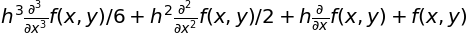

In [7]:
# can't find the link, however this was useful
sum(h**i/factorial(i) * f(x,y).diff(x, i) for i in range(4))

In [8]:
from sympy.abc import i, n
sum(sum((x-a)**i (y-b)**n/(factorial(i)*factorial(n)) * f(x,y).diff(x, i).diff(y,n),(i,1,4)),(n,1,4))

TypeError: 'Zero' object is not iterable

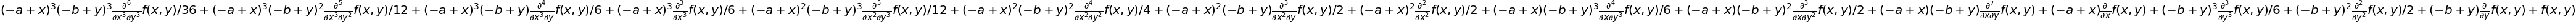

In [9]:
# original code
# http://firsttimeprogrammer.blogspot.co.uk/2015/03/taylor-series-with-python-and-sympy.html

# multivariable modification (myself)
def taylor(function,x0,y0, n):
    
    m=0
    p = 0
    while m <= n:
        i = 0
        while i <= n:
            p = p + (function.diff(x,i).diff(y,m))/(factorial(i)*factorial(m))*(x-x0)**i*(y-y0)**m
            i += 1
        m += 1
    return p

(taylor(f(x,y), a, b, 3))

In [ ]:
# another from the first stack overflow link, just another way of replacing (x-x0) with h
FW = f(x+h).series(x+h, x0=a, n=3)
FW = FW.subs(x-a,0)
FW

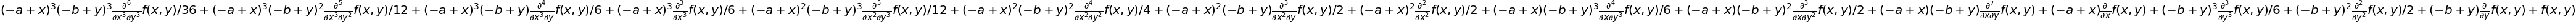

In [18]:
# expanding up the mathematics in the taylor function based on the series definition on
# wikipedia
def taylor2(function,x0,y0, n):
    
    m=0
    p = 0
    while m <= n:
        i = 0
        fd = function.diff(y,m)
        prod = (y-y0)**m
        facto = factorial(m)
        while i <= n:
            fm = fd.diff(x,i)
            prod2 = prod*(x-x0)**i
            facto2 = facto*factorial(i)            
            p = p + fm/facto2*prod2
            i += 1
        m += 1
    return p

(taylor2(f(x,y), a, b, 3))
    

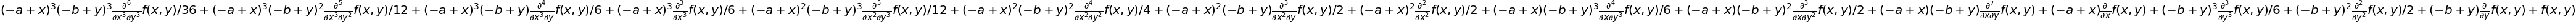

In [11]:
# recursive function (written by me) based on above code

# p: the sum
# fd: the function i.e. f(x,y,z)
# prod: the current product i.e (x-x0)^3 * (y-y0)^2
# the list X contains the coordinates, 
# the list X0 contains the point the series is expanded about i.e. X0=[a,b]
# the number n contains the current coordinate, i.e. n=0, then X[0] is x
# the number N contains the order of the expansion
# the number num_coords contains the number of coordinates
def taylor3_rec(p, fd, prod, facto, X, X0, n, N, num_coords):

    i = 0
    while i<= N:
        fm = fd.diff(X[n], i)
        prod2 = prod* (X[n]-X0[n])**i
        facto2 = facto * factorial(i)
        
        if n == num_coords-1:
            p = p + (fm/facto2)*prod2
        else:
            p=taylor3_rec(p, fm, prod2, facto2, X, X0, n+1, N, num_coords)
        i = i+1
    return p

X = [x,y]
X0 = [a,b]
n =0
N = 3
p = 0
fd = f(x,y)


taylor3_rec(p, f(x,y), 1, 1, X, X0, n, N,2)



In [12]:
# does the function work for 2 variables?
taylor3_rec(p, f(x,y), 1, 1, X, X0, n, N,2) == (taylor2(f(x,y), a, b, 3))

True

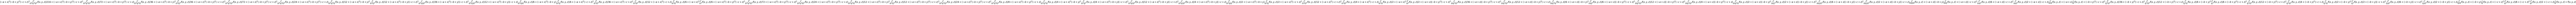

In [17]:
# loop rollout for function of 3 variables, to test the recursive function
def taylor3(function,x0,y0, z0, n):
    
    m=0
    p = 0
    while m <= n:
        i = 0
        fd = function.diff(z,m)
        prod = (z-z0)**m
        facto = factorial(m)
        while i <= n:
            k = 0
            fm = fd.diff(y,i)
            prod2 = prod*(y-y0)**i
            facto2 = facto*factorial(i)    
            while k <= n:
                fm2 = fm.diff(x,k)
                prod22 = prod2 *(x-x0)**k
                facto22 = facto2 * factorial(k)
                p = p + fm2/facto22*prod22
                k += 1
            i += 1
        m += 1
    return p

z,c = symbols('z,c')

(taylor3(f(x,y,z), a, b,c, 3))

In [20]:
# does the function work for 2 variables?
X = [x,y,z]
X0 = [a,b,c]
N = 3
num_coords = 3
taylor3_rec(p, f(x,y,z), 1, 1, X, X0, n, N,num_coords) == (taylor3(f(x,y,z), a, b,c, 3))

True

In [ ]:
# just for fun, printing the function for 4 variables
# NOTE: This slows down the browser
x_1, x_2, x_3, x_4 = symbols("x_1, x_2, x_3, x_4")
c,d = symbols("c,d")
X = [x_1, x_2, x_3, x_4]
X0 = [a,b,c,d]

n =0
N = 3
p = 0
g = Function("g")



taylor3_rec(p, g(x_1,x_2,x_3,x_4), 1, 1, X, X0, n, N,4)

### Now I would like to limit the output to a maximum order usng N

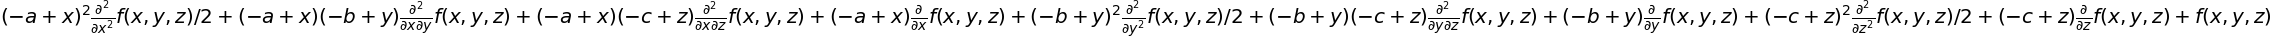

In [23]:
# 


# recursive function (written by me) based on above code

# p: the sum
# fd: the function i.e. f(x,y,z)
# prod: the current product i.e (x-x0)^3 * (y-y0)^2
# the list X contains the coordinates, 
# the list X0 contains the point the series is expanded about i.e. X0=[a,b]
# the number n contains the current coordinate, i.e. n=0, then X[0] is x
# the number curr_order contains the sum of the iterators n1+n2+...nd for limirting output
# the number N contains the order of the expansion
# the number num_coords contains the number of coordinates
def taylor4_rec(p, fd, prod, facto, X, X0, n, curr_order, N, num_coords):

    i = 0
    while i<= N:
        fm = fd.diff(X[n], i)
        prod2 = prod* (X[n]-X0[n])**i
        facto2 = facto * factorial(i)
        
        if n == num_coords-1:
            if curr_order+i < N: # simple insertion of another if statement
                p = p + (fm/facto2)*prod2
        else:
            if curr_order+i < N: # simple insertion of another if statement
                p=taylor4_rec(p, fm, prod2, facto2, X, X0, n+1, curr_order+i, N, num_coords)
        i = i+1
    return p

X = [x,y,z]
X0 = [a,b,c]
n =0
N = 3
p = 0
fd = f(x,y,z)


taylor4_rec(p, f(x,y,z), 1, 1, X, X0, n,0, N,3)

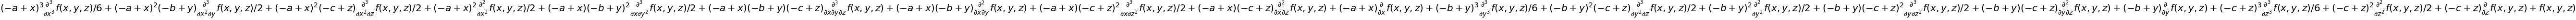

In [24]:
N=4
taylor4_rec(p, f(x,y,z), 1, 1, X, X0, n,0, N,3)

### Now I would like to see $\delta x$ instead of $x-x_0$ 

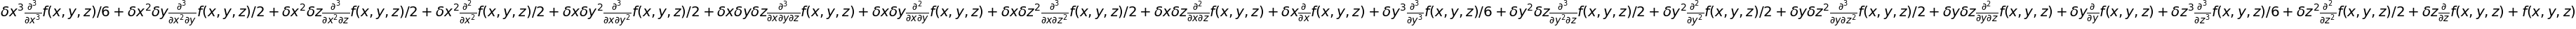

In [35]:
# 


# recursive function (written by me) based on above code

# p: the sum
# fd: the function i.e. f(x,y,z)
# prod: the current product i.e (x-x0)^3 * (y-y0)^2
# the list X contains the coordinates, 
# the list X0 contains the point the series is expanded about i.e. X0=[a,b]
# the number n contains the current coordinate, i.e. n=0, then X[0] is x
# the number curr_order contains the sum of the iterators n1+n2+...nd for limirting output
# the number N contains the order of the expansion
# the number num_coords contains the number of coordinates
def taylor5_rec(p, fd, prod, facto, X, DX, n, curr_order, N, num_coords):

    i = 0
    while i<= N:
        fm = fd.diff(X[n], i)
        prod2 = prod* DX[n]**i
        facto2 = facto * factorial(i)
        
        if n == num_coords-1:
            if curr_order+i < N: # simple insertion of another if statement
                p = p + (fm/facto2)*prod2
        else:
            if curr_order+i < N: # simple insertion of another if statement
                p=taylor5_rec(p, fm, prod2, facto2, X, DX, n+1, curr_order+i, N, num_coords)
        i = i+1
    return p

deltax,deltay,deltaz = symbols("\delta\ x,\delta\ y,\delta\ z")

X = [x,y,z]
DX = [deltax,deltay,deltaz]
n =0
N = 4
p = 0
fd = f(x,y,z)


taylor5_rec(p, f(x,y,z), 1, 1, X, DX, n,0, N,3)

### Now to establish a Taylor series using Tensor notation
   
## Note: Best viewed on notebook viewer, this is version 1

In [37]:
from sympy import IndexedBase, Idx
L = Idx('L')
A = Idx('A')
i = Idx('i')
j = Idx('j')
T = IndexedBase("T")
T[i,j]

In [72]:
M=Idx("M")
P=Idx("P")
Q=Idx("Q")
R=Idx("R")
Q=Idx("Q")
R=Idx("R")
# will need to start using greek for these, or a different font?
J=Idx("J")
K=Idx("K")
C=Idx("C")
B=Idx("B")

multi_index = [[L,A],[M,P],[Q,R], [J,K], [A,B]]
multi_index[0][1]

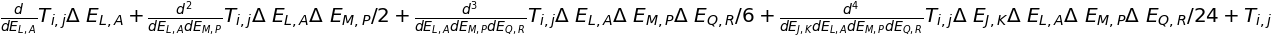

In [76]:
# expanding up the mathematics in the taylor function based on the series definition on
# wikipedia
def taylor_tensor(function,i, j, E, deltaE, multi_index, n):
    
    m=0
    p = 0
    fd =  function
    prod = 1
    while m <= n:
        fd =  function
        prod = 1
        for zz in range(0,m):
            fd= Derivative(fd, E[multi_index[zz][0],multi_index[zz][1]] )
            prod *= deltaE[multi_index[zz][0],multi_index[zz][1]]
            
        facto = factorial(m)
        p = p + (1/facto)*(fd).subs({function:function[i,j]})*prod

        m += 1
    return p



E= IndexedBase("E")
deltaE = IndexedBase("\Delta\ E")
(taylor_tensor(T,i,j, E, deltaE,multi_index, 4))